In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from pandas import DataFrame
from pandas import concat
from matplotlib.pylab import rcParams
from collections import defaultdict
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split , cross_val_score , KFold
from sklearn.metrics import explained_variance_score , mean_absolute_error , mean_squared_error , r2_score
from sklearn.neural_network import MLPRegressor
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,LSTM
from tensorflow.keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras import optimizers


In [2]:

#Reading the data
dataframe=pd.read_excel('net-income.xlsx' ,header=None)
dataframe=dataframe.iloc[:,1:]
dataframe

,1,2,3,4,5,6,7,8,9,10,11
0,NaN,الربع الأول عام 2017م\nFirst quarter 2017,الربع الثاني عام 2017م\nSecond quarter 2017,الربع الثالث عام 2017م\nThird quarter 2017,الربع الرابع عام 2017م\nFourth quarter 2017,الربع الأول عام 2018م\nFirst quarter 2018,الربع الثاني عام 2018م\nSecond quarter 2018,الربع الثالث عام 2018م\nThird quarter 2018,الربع الرابع عام 2018م\nFourth quarter 2018,الربع الأول عام 2019م\nFirst quarter 2019,الربع الثاني عام 2019م\nSecond quarter 2019
1,Real Estate Mgmt & Dev't,311.2848,284.1086,413.2518,563,358.5467,100.135,658.9947,-139.5,202.54,418.0135
2,Telecommunication Services,2395.0903,2250.0079,2420.405,2349,2416.796,2327.845,2659.703,3585.1,2946.3,3016
3,"Pharma, Biotech & Life Science",101.2168,46.564,-17,42,55.23,35.9418,-1.9736,13.6,-12.34,-189
4,Diversified Financials,153.1751,227.2007,261.4885,-268,160.4958,242.1526,256.6186,-56.2,180.12,179
5,Media,5.8374,8.5519,27.7312,-3,10.2125,86.5093,37.9436,-48,81.38,87
6,Consumer Services,227.7234,314.1519,232.9316,74,146.2012,161.2858,-208.9552,86.5,133.09,170
7,Commercial & Professional Svc,105.5862,118.203,125.8521,106,101.5929,117.2188,130.7384,55.4,80.51,174.2972
8,Health Care Equipment & Svc,378.1443,281.1516,292.0091,324,364.1227,208.8921,179.7855,188.2,250.44,183
9,Capital Goods,31.0822,67.5914,-34.1316,-190,-51.2242,-180.7302,-76.3169,-395.7,-73.98,-259


In [3]:
df = pd.read_csv('saudi_stock_market_dataset.csv')
df

,Unnamed: 0,الشركة,السهم,القطاع,آخر سعر,نسبة التغيير,آخر تحديث
0,0,سامبا,1090,البنوك,29.8,-1.16%,05 أغسطس 2019
1,1,السعودي الفرنسي,1050,البنوك,37.5,-3.47%,05 أغسطس 2019
2,2,الأول,1040,البنوك,19.58,1.45%,13 يونيو 2019
3,3,الجزيرة,1020,البنوك,14.74,-2.12%,05 أغسطس 2019
4,4,الرياض,1010,البنوك,25.05,-1.96%,05 أغسطس 2019
...,...,...,...,...,...,...,...
531,203,التطويرية الغذائية,9501,الخدمات الإستهلاكية,88,-2.11%,07 أغسطس 2019
532,204,الصمعاني,9504,الخدمات التجارية والمهنية,44.7,-0.67%,07 أغسطس 2019
533,205,الكثيري,9508,المواد الأساسية,43.95,1.03%,07 أغسطس 2019
534,206,الوطنية للتعليم,4291,الخدمات الإستهلاكية,26.45,0.19%,07 أغسطس 2019


In [1]:
replace_dict = {'البنوك':'Banks' , 'إدارة وتطوير العقارات':'Real Estate Mgmt & Dev\'t' , 'الإتصالات':'Telecommunication Services' , 'المواد الأساسية': 'Materials' , 'الرعاية الصحية':'Health Care Equipment & Svc' , 'السلع الرأسمالية':'Capital Goods' , 'المرافق العامة' :'Utilities' , 'النقل':'Transportation' , 'التأمين':'Insurance' , 'إنتاج الأغذية':'Food & Beverages','تجزئة السلع الكمالية': 'Retailing' , 'الطاقة':'Energy' , 'الإستثمار والتمويل':'Diversified Financials' , 'الخدمات الإستهلاكية':'Consumer Services' , 'السلع طويلة الاجل':'Consumer Durables & Apparel' , 'الخدمات التجارية والمهنية':'Commercial & Professional Svc' , 'الإعلام والترفيه':'Media' , 'البنوك والخدمات المالية' : 'Banks' , 'البضائع والخدمات الاستهلاكية' :'Consumer Services' , 'الادوية' : 'Pharma, Biotech & Life Science' , 'العقارات' : 'Real Estate Mgmt & Dev\'t' , 'تجزئة الأغذية' : 'Food & Staples Retailing'}

In [2]:
replace_dict

{'البنوك': 'Banks',
 'إدارة وتطوير العقارات': "Real Estate Mgmt & Dev't",
 'الإتصالات': 'Telecommunication Services',
 'المواد الأساسية': 'Materials',
 'الرعاية الصحية': 'Health Care Equipment & Svc',
 'السلع الرأسمالية': 'Capital Goods',
 'المرافق العامة': 'Utilities',
 'النقل': 'Transportation',
 'التأمين': 'Insurance',
 'إنتاج الأغذية': 'Food & Beverages',
 'تجزئة السلع الكمالية': 'Retailing',
 'الطاقة': 'Energy',
 'الإستثمار والتمويل': 'Diversified Financials',
 'الخدمات الإستهلاكية': 'Consumer Services',
 'السلع طويلة الاجل': 'Consumer Durables & Apparel',
 'الخدمات التجارية والمهنية': 'Commercial & Professional Svc',
 'الإعلام والترفيه': 'Media',
 'البنوك والخدمات المالية': 'Banks',
 'البضائع والخدمات الاستهلاكية': 'Consumer Services',
 'الادوية': 'Pharma, Biotech & Life Science',
 'العقارات': "Real Estate Mgmt & Dev't",
 'تجزئة الأغذية': 'Food & Staples Retailing'}

In [5]:
df['القطاع'].replace(replace_dict ,  inplace=True)

In [6]:
df['القطاع']

0                              Banks
1                              Banks
2                              Banks
3                              Banks
4                              Banks
                   ...              
531                Consumer Services
532    Commercial & Professional Svc
533                        Materials
534                Consumer Services
535    Commercial & Professional Svc
Name: القطاع, Length: 536, dtype: object

In [7]:
df['آخر تحديث']

0      05 أغسطس 2019
1      05 أغسطس 2019
2      13 يونيو 2019
3      05 أغسطس 2019
4      05 أغسطس 2019
           ...      
531    07 أغسطس 2019
532    07 أغسطس 2019
533    07 أغسطس 2019
534    07 أغسطس 2019
535              NaN
Name: آخر تحديث, Length: 536, dtype: object

In [8]:
df['آخر تحديث'] = df['آخر تحديث'].str[3:]
df['آخر تحديث']


0      أغسطس 2019
1      أغسطس 2019
2      يونيو 2019
3      أغسطس 2019
4      أغسطس 2019
          ...    
531    أغسطس 2019
532    أغسطس 2019
533    أغسطس 2019
534    أغسطس 2019
535           NaN
Name: آخر تحديث, Length: 536, dtype: object

In [9]:
df['آخر تحديث'] = df['آخر تحديث'].str[:-5]
df['آخر تحديث']


0      أغسطس
1      أغسطس
2      يونيو
3      أغسطس
4      أغسطس
       ...  
531    أغسطس
532    أغسطس
533    أغسطس
534    أغسطس
535      NaN
Name: آخر تحديث, Length: 536, dtype: object

In [10]:
df['آخر تحديث'] = df['آخر تحديث'].replace('يناير' , 1)
df['آخر تحديث'] = df['آخر تحديث'].replace('فبراير' , 1)
df['آخر تحديث'] = df['آخر تحديث'].replace('مارس' , 1)

df['آخر تحديث'] = df['آخر تحديث'].replace('أبريل' , 2)
df['آخر تحديث'] = df['آخر تحديث'].replace('مايو' , 2)
df['آخر تحديث'] = df['آخر تحديث'].replace('يونيو' , 2)

df['آخر تحديث'] = df['آخر تحديث'].replace('يوليو' , 3)
df['آخر تحديث'] = df['آخر تحديث'].replace('أغسطس' , 3)
df['آخر تحديث'] = df['آخر تحديث'].replace('سبتمبر' , 3)

df['آخر تحديث'] = df['آخر تحديث'].replace('أكتوبر' , 4)
df['آخر تحديث'] = df['آخر تحديث'].replace('نوفمبر' , 4)
df['آخر تحديث'] = df['آخر تحديث'].replace('ديسمبر' , 4)


In [11]:
df['آخر تحديث'] = df['آخر تحديث'].replace('أغسطس' , 3)


In [12]:
df['آخر تحديث'] 

0        3
1        3
2        2
3        3
4        3
      ... 
531      3
532      3
533      3
534      3
535    NaN
Name: آخر تحديث, Length: 536, dtype: object

In [13]:
df

,Unnamed: 0,الشركة,السهم,القطاع,آخر سعر,نسبة التغيير,آخر تحديث
0,0,سامبا,1090,Banks,29.8,-1.16%,3
1,1,السعودي الفرنسي,1050,Banks,37.5,-3.47%,3
2,2,الأول,1040,Banks,19.58,1.45%,2
3,3,الجزيرة,1020,Banks,14.74,-2.12%,3
4,4,الرياض,1010,Banks,25.05,-1.96%,3
...,...,...,...,...,...,...,...
531,203,التطويرية الغذائية,9501,Consumer Services,88,-2.11%,3
532,204,الصمعاني,9504,Commercial & Professional Svc,44.7,-0.67%,3
533,205,الكثيري,9508,Materials,43.95,1.03%,3
534,206,الوطنية للتعليم,4291,Consumer Services,26.45,0.19%,3


In [14]:
df = df.rename(columns={"القطاع": "type", "آخر تحديث": "Quarter" , "السهم":"value"})

df = df[['value' , 'type' , 'Quarter']]

In [15]:
df

,Unnamed: 0,الشركة,value,type,آخر سعر,نسبة التغيير,Quarter
0,0,سامبا,1090,Banks,29.8,-1.16%,3
1,1,السعودي الفرنسي,1050,Banks,37.5,-3.47%,3
2,2,الأول,1040,Banks,19.58,1.45%,2
3,3,الجزيرة,1020,Banks,14.74,-2.12%,3
4,4,الرياض,1010,Banks,25.05,-1.96%,3
...,...,...,...,...,...,...,...
531,203,التطويرية الغذائية,9501,Consumer Services,88,-2.11%,3
532,204,الصمعاني,9504,Commercial & Professional Svc,44.7,-0.67%,3
533,205,الكثيري,9508,Materials,43.95,1.03%,3
534,206,الوطنية للتعليم,4291,Consumer Services,26.45,0.19%,3


In [16]:
df = df[['value' , 'type' , 'Quarter']]

In [17]:
df

,value,type,Quarter
0,1090,Banks,3
1,1050,Banks,3
2,1040,Banks,2
3,1020,Banks,3
4,1010,Banks,3
...,...,...,...
531,9501,Consumer Services,3
532,9504,Commercial & Professional Svc,3
533,9508,Materials,3
534,4291,Consumer Services,3


In [18]:
df['type'].value_counts()

Materials                         124
Insurance                          67
Banks                              59
Food & Beverages                   47
Capital Goods                      35
Consumer Services                  29
Real Estate Mgmt & Dev't           27
Retailing                          19
Transportation                     16
Consumer Durables & Apparel        15
Energy                             14
Health Care Equipment & Svc        13
Telecommunication Services         12
Diversified Financials             11
Food & Staples Retailing           10
Commercial & Professional Svc       8
Utilities                           7
Media                               7
التطبيقات وخدمات التقنية            4
Pharma, Biotech & Life Science      3
الصناعات                            3
9.13                                2
9.5                                 2
15.04                               1
15.3                                1
Name: type, dtype: int64

In [19]:
df  = df[df['type']!='التطبيقات وخدمات التقنية']
df  = df[df['type']!='الصناعات']
df  = df[df['type']!='9.5']
df  = df[df['type']!='9.13']
df  = df[df['type']!='15.04']
df  = df[df['type']!='15.3']


In [20]:
df['type'].value_counts()

Materials                         124
Insurance                          67
Banks                              59
Food & Beverages                   47
Capital Goods                      35
Consumer Services                  29
Real Estate Mgmt & Dev't           27
Retailing                          19
Transportation                     16
Consumer Durables & Apparel        15
Energy                             14
Health Care Equipment & Svc        13
Telecommunication Services         12
Diversified Financials             11
Food & Staples Retailing           10
Commercial & Professional Svc       8
Media                               7
Utilities                           7
Pharma, Biotech & Life Science      3
Name: type, dtype: int64

In [21]:
df = df.dropna(how='any')

In [22]:
df

,value,type,Quarter
0,1090,Banks,3
1,1050,Banks,3
2,1040,Banks,2
3,1020,Banks,3
4,1010,Banks,3
...,...,...,...
530,9510,Capital Goods,3
531,9501,Consumer Services,3
532,9504,Commercial & Professional Svc,3
533,9508,Materials,3


In [23]:
df = df.loc[df.value.str.isnumeric()]

In [24]:
df

,value,type,Quarter
0,1090,Banks,3
1,1050,Banks,3
2,1040,Banks,2
3,1020,Banks,3
4,1010,Banks,3
...,...,...,...
530,9510,Capital Goods,3
531,9501,Consumer Services,3
532,9504,Commercial & Professional Svc,3
533,9508,Materials,3


In [25]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['type'] = LE.fit_transform(df['type'])
df

C:\Users\HP\AppData\Local\Temp/ipykernel_2304/2944931900.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = LE.fit_transform(df['type'])


,value,type,Quarter
0,1090,0,3
1,1050,0,3
2,1040,0,2
3,1020,0,3
4,1010,0,3
...,...,...,...
530,9510,1,3
531,9501,4,3
532,9504,2,3
533,9508,11,3


In [26]:
df['value'] = df['value'].astype('float32')

df['type'] = df['type'].astype('float32')

df['Quarter'] = df['Quarter'].astype('float32')


C:\Users\HP\AppData\Local\Temp/ipykernel_2304/874294590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value'] = df['value'].astype('float32')
C:\Users\HP\AppData\Local\Temp/ipykernel_2304/874294590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = df['type'].astype('float32')
C:\Users\HP\AppData\Local\Temp/ipykernel_2304/874294590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [27]:
real_x_test = df[['Quarter' , 'type']]

real_y_test = df[['value']]

In [28]:
# import csv
# f = open('net-income4.csv', 'w')
# header = ['type', 'Quarter','value']
# writer = csv.writer(f)
# writer.writerow(header)

In [29]:
# for j in range(dataframe.shape[1]):
#   for i in range(dataframe.shape[0]):
#     if (j!=0 and i!=0):
#       data=[dataframe.iloc[i,0],j,dataframe.iloc[i,j]]
#       writer.writerow(data)

In [30]:
# import pandas as pd
# import numpy as np
# data=pd.read_csv('/content/net-income4.csv')
# data

In [31]:
data = pd.read_csv('net-income4 (1).csv' ,encoding= 'unicode_escape',  delimiter=';') 
data = data.dropna()
data

,type,Quarter,value
3,Telecommunication Services,1.0,2395.0903
5,Pharma,1.0,101.2100
7,Diversified Financials,1.0,153.1751
9,Media,1.0,5.8374
11,Consumer Services,1.0,227.7234
...,...,...,...
371,Food & Beverages,10.0,678.0000
373,Food & Staples Retailing,10.0,59.0000
375,Retailing,10.0,483.0000
377,Banks,10.0,10099.0000


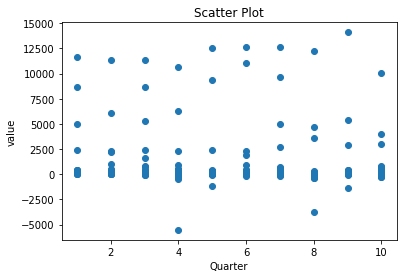

In [32]:

plt.scatter(data['Quarter'], data['value'])
# Adding Title to the Plot
plt.title("Scatter Plot")
# Setting the X and Y labels
plt.xlabel('Quarter')
plt.ylabel('value')
  
plt.show()

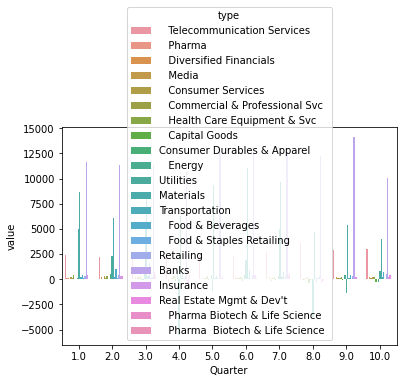

In [33]:
import seaborn as sns

sns.barplot(x='Quarter',y='value', data=data, hue='type')
plt.rcParams["figure.figsize"] = (20,2)
plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['type'] = LE.fit_transform(data['type'])
data

,type,Quarter,value
3,20,1.0,2395.0903
5,17,1.0,101.2100
7,11,1.0,153.1751
9,16,1.0,5.8374
11,10,1.0,227.7234
...,...,...,...
371,13,10.0,678.0000
373,14,10.0,59.0000
375,5,10.0,483.0000
377,0,10.0,10099.0000


In [35]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as numpy 
import matplotlib.pyplot as plt

In [36]:
train_data=data.iloc[:152,:]
test_data=data.iloc[152:,:]

In [37]:
rarget=data.iloc[:,2:]

In [38]:
#Converting the data to float datatype, as we are going to deal with exponentials
X_train=train_data.iloc[:,:2]
Y_train=train_data.iloc[:,2:]
X_test=test_data.iloc[:,:2]
Y_test=test_data.iloc[:,2:]


In [39]:
scaler= StandardScaler()
scaler.fit(rarget)
Y_train= scaler.transform(Y_train)
Y_test= scaler.transform(Y_test)

real_y_test = scaler.transform(real_y_test)

In [40]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from pandas import DataFrame
from pandas import concat
from matplotlib.pylab import rcParams
from collections import defaultdict
from scipy.spatial import distance
from sklearn.cluster import KMeans
import numpy as np
from sklearn.neural_network import MLPRegressor
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,LSTM
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras import optimizers 

In [41]:
# Gaussian function
def RBFunction(r, x,c ):
    return( np.exp(- (distance.euclidean(x, c))**2/r**2))

# Computing radial/spread
def radial (x,c ):
    r=[]
    for i in range (c.shape[0]):
        k=[]
        for j in range(x.shape[0]) :
            k.append(distance.euclidean(x.iloc[j,:], c[i])) 
        m=(sum(k)/len(k))
        r.append(m)
    return(r)

# compute the centers using Kmeans

def centers (data,n):
    kmeans = KMeans(n_clusters=n)
    a = kmeans.fit(data)
    return(kmeans.cluster_centers_)     

#Preparing the RBF network

def RBF (centers,radials, X): 
    s=[[]for k in range (centers.shape[0])]
    
    for i in range (centers.shape[0]):
        for j in range (X.shape[0]):
            X=pd.DataFrame(X)
            s[i] .append(RBFunction(radials[i] ,X.iloc[j,:],centers[i]))
    s=pd.DataFrame(s)
    return(s.transpose()) 

In [42]:



def MAPE(y,pred):
        mapev=[]
        aux1=y.reset_index(drop=True)
        aux1=pd.Series(aux1)
        aux2=pd.Series(pred)

        for i in aux1.index:
            if aux1[i]==0:
                mapev.append(0)
            else:
                mapev.append(abs(aux1[i]-aux2[i])/aux1[i])

        mape=(np.mean(mapev))*100
        return(mape)
def MAD_MSD(y,pred):
        madv=[]
        mapev=[]
        aux1=y.reset_index(drop=True)
        aux1=pd.Series(aux1)
        aux2=pd.Series(pred)
        for i in aux1.index:
            if aux1[i]==0:
                mapev.append(0)
            else:
                mapev.append(abs(aux1[i]-aux2[i])/aux1[i])
        for i in aux1.index:
            if aux1[i]!=0:
               madv.append(mapev[i]*aux1[i])
            else:
               madv.append(0)
        mad=np.mean(madv)
        #MSD:Mean squared deviation
        msdv=np.square(madv)
        msd=np.mean(msdv)
        return(mad,msd)
def SMAPE(y,pred):
       smapev=[]
       smape=0
       aux1=y.reset_index(drop=True)
       aux1=pd.Series(aux1)
       aux2=pd.Series(pred)
       for i in aux1.index:
           if aux1[i]==0:
              smapev.append(0)
           else:
               smapev.append(2*(abs(aux1[i]-aux2[i])/((abs(aux1[i])+abs(aux2[i])))))

       smape = (np.mean(smapev))*100
       return(smape)
    

In [43]:

#neural network initialization
# Hyperparameter: number of centers/units of the hidden layer nc
nc=20
#Train
c=centers(X_train , nc)
r=radial(X_train,c)
inputs_train= pd.DataFrame(RBF(c,r,X_train))

#Test
inputs_t= pd.DataFrame(RBF(c,r,X_test))

In [44]:
model = Sequential()
model.add(Dense(1, input_dim=nc, kernel_initializer='normal'))
    # Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

#change optimizer from SGD to Adam

In [45]:
#data preparation
inputs_train_arr=np.array(inputs_train)
inputs_t_arr=np.array(inputs_t)
y_train_arr=np.array(Y_train)
y_t_arr=np.array(Y_test)

#train the model
model.fit(inputs_train_arr,y_train_arr, epochs=1000, batch_size=50,verbose=1)

#change batch size from 50 to 64
#change epochs from 10000 to only 500

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9742
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.9672
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9621
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9567
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9530
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.9495
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9457
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9427
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9401
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.9378
Epoch 11/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.9359
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9331
Epoch 13/1000
4/4 [==============================

4/4 [==============================] - 0s 2ms/step - loss: 0.7753
Epoch 205/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7744
Epoch 206/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7732
Epoch 207/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7724
Epoch 208/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7716
Epoch 209/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7716
Epoch 210/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7714
Epoch 211/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7717
Epoch 212/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7720
Epoch 213/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7728
Epoch 214/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7727
Epoch 215/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7713
Epoch 216/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.7478
Epoch 407/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7478
Epoch 408/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7477
Epoch 409/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7474
Epoch 410/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7473
Epoch 411/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7471
Epoch 412/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7469
Epoch 413/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7468
Epoch 414/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7468
Epoch 415/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7466
Epoch 416/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7466
Epoch 417/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7466
Epoch 418/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.7332
Epoch 609/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7331
Epoch 610/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7330
Epoch 611/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7332
Epoch 612/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7332
Epoch 613/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7336
Epoch 614/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7336
Epoch 615/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7334
Epoch 616/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7332
Epoch 617/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7332
Epoch 618/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7329
Epoch 619/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7328
Epoch 620/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.7244
Epoch 811/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7246
Epoch 812/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7249
Epoch 813/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7259
Epoch 814/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7259
Epoch 815/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7255
Epoch 816/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7243
Epoch 817/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7245
Epoch 818/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7246
Epoch 819/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7242
Epoch 820/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7238
Epoch 821/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7232
Epoch 822/1000
4/4 [=======================

## **RBFNetwork**

In [46]:
out=model.predict(inputs_t_arr)
mae=mean_absolute_error(Y_test, out)
mse=mean_squared_error(Y_test, out)
rmse=np.sqrt(mse)
nn=['MAE','MSE','RMSE']
metric=[mae,mse,rmse]
performance=pd.DataFrame([nn,metric])
performance



,0,1,2
0,MAE,MSE,RMSE
1,0.57675,0.708271,0.841588


# **linear regression**

In [47]:
#linear model
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
mr=regr.fit(X_train, Y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [48]:
#Test
var=explained_variance_score(Y_test, y_pred) 
mae=mean_absolute_error(Y_test, y_pred)
mse=mean_squared_error(Y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test, y_pred )  
metric=[mae,mse,rmse]
nn=['MAE','MSE','RMSE']
performance=pd.DataFrame([nn,metric])
performance

,0,1,2
0,MAE,MSE,RMSE
1,0.583384,0.812106,0.901169


# **`ANN `**

In [49]:
classifier = Sequential() #we use classification because were going to predict tje tested result
classifier.add(Dense(units = 6,kernel_initializer="uniform",activation="relu",input_dim = 2))
classifier.add(Dense(
		units = 6,
		kernel_initializer="uniform",
		activation="relu"
		))
#adding output layer (final layer), sum of units is 1 because we just have 1 output
classifier.add(Dense(
		units = 1,
		kernel_initializer="uniform",
		activation="sigmoid"))
classifier.compile(loss='mean_squared_error', optimizer='adam')
#change optimizer from SGD to Adam

In [50]:

classifier.fit(
		X_train,
		Y_train,
		epochs=500, batch_size=64,verbose=1)

#change batch size from 50 to 64
#change epochs from 10000 to only 500

Epoch 1/500
3/3 [==============================] - 0s 1ms/step - loss: 1.2523
Epoch 2/500
3/3 [==============================] - 0s 2ms/step - loss: 1.2514
Epoch 3/500
3/3 [==============================] - 0s 2ms/step - loss: 1.2506
Epoch 4/500
3/3 [==============================] - 0s 3ms/step - loss: 1.2496
Epoch 5/500
3/3 [==============================] - 0s 3ms/step - loss: 1.2487
Epoch 6/500
3/3 [==============================] - 0s 3ms/step - loss: 1.2476
Epoch 7/500
3/3 [==============================] - 0s 3ms/step - loss: 1.2465
Epoch 8/500
3/3 [==============================] - 0s 4ms/step - loss: 1.2453
Epoch 9/500
3/3 [==============================] - 0s 3ms/step - loss: 1.2439
Epoch 10/500
3/3 [==============================] - 0s 2ms/step - loss: 1.2425
Epoch 11/500
3/3 [==============================] - 0s 3ms/step - loss: 1.2409
Epoch 12/500
3/3 [==============================] - 0s 2ms/step - loss: 1.2391
Epoch 13/500
3/3 [==============================] - 0s 2ms/st

3/3 [==============================] - 0s 2ms/step - loss: 0.7990
Epoch 207/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7991
Epoch 208/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7989
Epoch 209/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7989
Epoch 210/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7989
Epoch 211/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7990
Epoch 212/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7989
Epoch 213/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7990
Epoch 214/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7988
Epoch 215/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7987
Epoch 216/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7988
Epoch 217/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7988
Epoch 218/500
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 0.7969
Epoch 411/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7971
Epoch 412/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7971
Epoch 413/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7970
Epoch 414/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7970
Epoch 415/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7969
Epoch 416/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7971
Epoch 417/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7969
Epoch 418/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7973
Epoch 419/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7968
Epoch 420/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7971
Epoch 421/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7972
Epoch 422/500
3/3 [==============================] - 0

In [51]:
#Train
out=classifier.predict(X_test)
mae=mean_absolute_error(Y_test, out)
mse=mean_squared_error(Y_test, out)
rmse=np.sqrt(mse)
nn=['MAE','MSE','RMSE']
metric=[mae,mse,rmse]
performance=pd.DataFrame([nn,metric])
performance

,0,1,2
0,MAE,MSE,RMSE
1,0.614878,0.685148,0.827737


# XGB Regressor

In [52]:
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, Y_train)
predicted = xgb.predict(X_test)


C:\Users\HP\anaconda3\envs\Renv\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\HP\anaconda3\envs\Renv\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [53]:

var=explained_variance_score(Y_test, predicted) 
mae=mean_absolute_error(Y_test, predicted)
mse=mean_squared_error(Y_test, predicted)
rmse=np.sqrt(mse)
r2=r2_score(Y_test, predicted )  
metric=[mae,mse,rmse]
nn=['MAE','MSE','RMSE']
performance=pd.DataFrame([nn,metric])
performance

,0,1,2
0,MAE,MSE,RMSE
1,0.159563,0.106175,0.325846


# test on real data using xgboost

In [54]:
real_predicted = xgb.predict(real_x_test)

var=explained_variance_score(real_y_test, real_predicted) 
mae=mean_absolute_error(real_y_test, real_predicted)
mse=mean_squared_error(real_y_test, real_predicted)
rmse=np.sqrt(mse)
r2=r2_score(real_y_test, real_predicted )  
metric=[mae,mse,rmse]
nn=['MAE','MSE','RMSE']
performance=pd.DataFrame([nn,metric])
performance


C:\Users\HP\anaconda3\envs\Renv\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,0,1,2
0,MAE,MSE,RMSE
1,1.111604,1.782863,1.335239


# test on real data using linear regression

In [55]:
real_predicted = regr.predict(real_x_test)

var=explained_variance_score(real_y_test, real_predicted) 
mae=mean_absolute_error(real_y_test, real_predicted)
mse=mean_squared_error(real_y_test, real_predicted)
rmse=np.sqrt(mse)
r2=r2_score(real_y_test, real_predicted )  
metric=[mae,mse,rmse]
nn=['MAE','MSE','RMSE']
performance=pd.DataFrame([nn,metric])
performance

C:\Users\HP\anaconda3\envs\Renv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


,0,1,2
0,MAE,MSE,RMSE
1,0.668073,0.827535,0.90969


# Test on real data using RBFN


In [56]:
inputs_t= pd.DataFrame(RBF(c,r,real_x_test))

inputs_t_arr=np.array(inputs_t)
y_t_arr=np.array(real_y_test)

In [57]:
out=model.predict(inputs_t_arr)
mae=mean_absolute_error(real_y_test, out)
mse=mean_squared_error(real_y_test, out)
rmse=np.sqrt(mse)
nn=['MAE','MSE','RMSE']
metric=[mae,mse,rmse]
performance=pd.DataFrame([nn,metric])
performance



,0,1,2
0,MAE,MSE,RMSE
1,0.640498,0.644159,0.802595


# Test on real data using ANN

In [58]:
#Train
out=classifier.predict(real_x_test)
mae=mean_absolute_error(real_y_test, out)
mse=mean_squared_error(real_y_test, out)
rmse=np.sqrt(mse)
nn=['MAE','MSE','RMSE']
metric=[mae,mse,rmse]
performance=pd.DataFrame([nn,metric])
performance

,0,1,2
0,MAE,MSE,RMSE
1,0.800239,1.14973,1.072255


**We choose root mean squared error(RMSE) to compare between the models**<br>
**The final Comparison** 

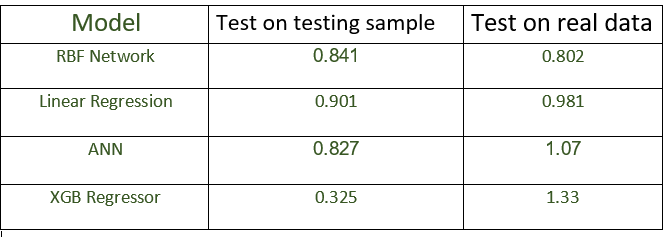